In [208]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [209]:
base_path = 'C:/Users/gujju/Desktop/CapstoneWork/'
folder_name = '3IntervalRuns/'

In [210]:
file_name = 'November 14th m1.xlarge matrixprod - 3_300.csv'

In [211]:
def create_dataframe(file_name):
    df = pd.read_csv(base_path + folder_name + file_name)
    column_names = df.columns
    bad_columns = ['cpuType', 'cpuMhz', 'sampleTime', 'elapsedTime', 'cputime', 'testName']
    df = df.drop(bad_columns, 1)
    df = df.dropna()
    return df

In [212]:
def return_modified_dataframe(df):
    modified_df = df[['output', 'cpuSteal']]
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(modified_df)
    df_normalized = pd.DataFrame(np_scaled)
    df_normalized.columns = ['output', 'cpuSteal']
    return df_normalized

In [213]:
def doClustering(df_normalized):
    model = KMeans(n_clusters=2)
    model.fit(df_normalized)
    return (model)

In [214]:
colormap = np.array(['red', 'lime', 'black'])

In [215]:
def cluster_mydata(df_normalized, model):
    plt.scatter(df_normalized.output, df_normalized.cpuSteal, c=colormap[model.labels_], s=40, label='vmIpAddress')
    plt.title('Clustering distribution of virtual machines')
    plt.ylabel('cpuSteal')
    plt.xlabel('bogo-ops')
    plt.legend(loc='upper right')
    plt.show()

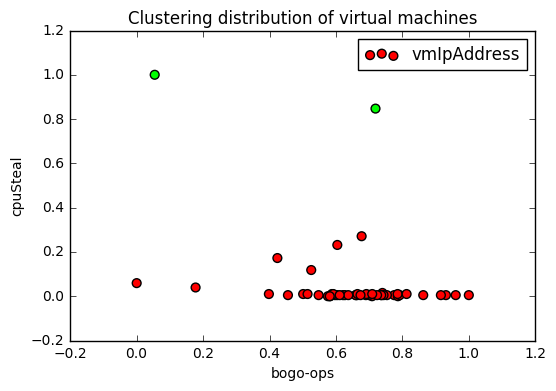

In [216]:
#Now first 
df = create_dataframe(file_name)
n_df = return_modified_dataframe(df) 
cluster_mydata(n_df, doClustering(n_df))

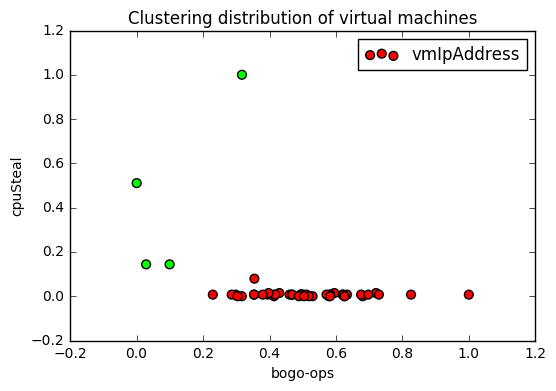

In [217]:
file_name = 'November 14th m1.xlarge matrixprod - 3_180.csv'
#Now first 
df = create_dataframe(file_name)
n_df = return_modified_dataframe(df) 
cluster_mydata(n_df, doClustering(n_df))

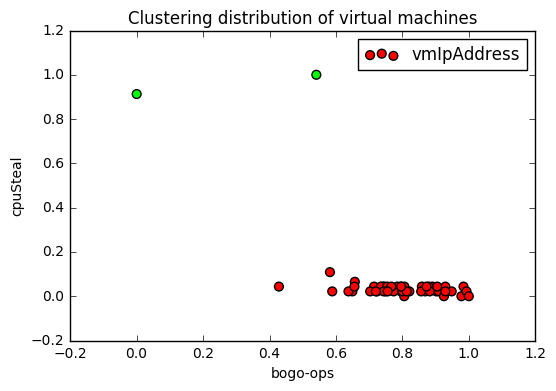

In [218]:
file_name = 'November 14th m1.xlarge matrixprod - 3_60.csv'
#Now first 
df = create_dataframe(file_name)
n_df = return_modified_dataframe(df) 
cluster_mydata(n_df, doClustering(n_df))